In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter), will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv
/kaggle/input/crime-cast-forecasting-crime-categories/train.csv
/kaggle/input/crime-cast-forecasting-crime-categories/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 


import datetime


from sklearn.model_selection import train_test_split 

In [3]:
train =pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/train.csv')
test=pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/test.csv')


In [4]:
train

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5100 W ADAMS BL,NaN,34.0334,-118.3523,05/24/2020 12:00:00 AM,05/24/2020 12:00:00 AM,700.0,3.0,Southwest,303.0,...,51.0,M,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Violent Crimes
19996,16900 ROSCOE BL,NaN,34.2212,-118.5011,12/25/2020 12:00:00 AM,12/25/2020 12:00:00 AM,259.0,10.0,West Valley,1008.0,...,0.0,M,W,301.0,GAS STATION,NaN,NaN,IC,Invest Cont,Property Crimes
19997,1000 S SHENANDOAH ST,NaN,34.0571,-118.3815,09/25/2020 12:00:00 AM,09/25/2020 12:00:00 AM,1400.0,8.0,West LA,849.0,...,42.0,M,H,102.0,SIDEWALK,NaN,NaN,IC,Invest Cont,Property Crimes
19998,300 W SEPULVEDA ST,NaN,33.7451,-118.2835,06/10/2020 12:00:00 AM,06/10/2020 12:00:00 AM,600.0,5.0,Harbor,558.0,...,76.0,F,H,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Crimes against Public Order


In [5]:
train.shape

(20000, 22)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

In [7]:
train.isnull().sum()

Location                     0
Cross_Street             16552
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
Crime_Category               0
dtype: int64

In [8]:
test.isnull().sum()

Location                    0
Cross_Street             4190
Latitude                    0
Longitude                   0
Date_Reported               0
Date_Occurred               0
Time_Occurred               0
Area_ID                     0
Area_Name                   0
Reporting_District_no       0
Part 1-2                    0
Modus_Operandi            684
Victim_Age                  0
Victim_Sex                643
Victim_Descent            643
Premise_Code                0
Premise_Description         1
Weapon_Used_Code         3153
Weapon_Description       3153
Status                      0
Status_Description          0
dtype: int64

In [9]:
test.shape

(5000, 21)

In [10]:
train['Location']

0         4500    CARPENTER                    AV
1                 45TH                         ST
2          600 E  MARTIN LUTHER KING JR        BL
3        14900    ORO GRANDE                   ST
4         7100 S  VERMONT                      AV
                           ...                   
19995     5100 W  ADAMS                        BL
19996    16900    ROSCOE                       BL
19997     1000 S  SHENANDOAH                   ST
19998      300 W  SEPULVEDA                    ST
19999             DALTON                       AV
Name: Location, Length: 20000, dtype: object

In [11]:
train['Location'].value_counts()

Location
6TH                                        33
7TH                                        32
VERMONT                      AV            31
6TH                          ST            31
7TH                          ST            30
                                           ..
2700 E  1ST                          ST     1
9300    SWINTON                      AV     1
MCKINLEY                                    1
WADE                         ST             1
DALTON                       AV             1
Name: count, Length: 12399, dtype: int64

In [12]:
train['Location'].unique()

array(['4500    CARPENTER                    AV',
       '45TH                         ST',
       '600 E  MARTIN LUTHER KING JR        BL', ...,
       '15800    STRATHERN                    ST',
       '5100 W  ADAMS                        BL',
       'DALTON                       AV'], dtype=object)

In [13]:
train['Crime_Category'].value_counts()

Crime_Category
Property Crimes                  11666
Violent Crimes                    4767
Crimes against Public Order       1808
Fraud and White-Collar Crimes     1355
Crimes against Persons             225
Other Crimes                       179
Name: count, dtype: int64

In [14]:
train.describe(include='object')

,Location,Cross_Street,Date_Reported,Date_Occurred,Area_Name,Modus_Operandi,Victim_Sex,Victim_Descent,Premise_Description,Weapon_Description,Status,Status_Description,Crime_Category
count,20000,3448,20000,20000,20000,17259,17376,17376,19995,7335,20000,20000,20000
unique,12399,1495,811,366,21,10489,4,17,216,57,5,5,6
top,6TH,BROADWAY,07/13/2020 12:00:00 AM,01/01/2020 12:00:00 AM,77th Street,0344,M,H,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
freq,33,56,87,137,1345,826,8538,6143,5033,3990,15236,15236,11666


In [15]:
train.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,7335.000000
mean,33.940704,-117.893072,1352.380350,10.834250,1129.599200,1.418150,30.135000,297.176950,366.405044
std,2.126810,7.377726,646.100291,6.033166,603.330519,0.493267,21.863645,212.007298,120.485687
min,0.000000,-118.663400,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.009200,-118.429700,930.000000,6.000000,632.000000,1.000000,12.000000,101.000000,312.000000
50%,34.058700,-118.323000,1430.000000,11.000000,1162.000000,1.000000,31.000000,203.000000,400.000000
75%,34.165025,-118.274400,1900.000000,16.000000,1622.000000,2.000000,46.000000,501.000000,400.000000
max,34.328100,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,969.000000,515.000000


* Latitude range: [0:34] ( General range is -90 to 90 )
* Longitude range: [-118: 0] (General range is 180 to 180)



In [16]:
def day_category(x):
    if 400<=x<1200:
        return 'Morning'
    elif 1200<=x<1700:
        return 'Daytime'
    elif 1800<=x<2100:
        return 'Evening'
    else:
        return 'Night'

In [17]:
train['day_category']=train['Time_Occurred'].apply(day_category )

In [18]:
train

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category,day_category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes,Evening
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes,Daytime
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes,Morning
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes,Evening
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5100 W ADAMS BL,NaN,34.0334,-118.3523,05/24/2020 12:00:00 AM,05/24/2020 12:00:00 AM,700.0,3.0,Southwest,303.0,...,M,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Violent Crimes,Morning
19996,16900 ROSCOE BL,NaN,34.2212,-118.5011,12/25/2020 12:00:00 AM,12/25/2020 12:00:00 AM,259.0,10.0,West Valley,1008.0,...,M,W,301.0,GAS STATION,NaN,NaN,IC,Invest Cont,Property Crimes,Night
19997,1000 S SHENANDOAH ST,NaN,34.0571,-118.3815,09/25/2020 12:00:00 AM,09/25/2020 12:00:00 AM,1400.0,8.0,West LA,849.0,...,M,H,102.0,SIDEWALK,NaN,NaN,IC,Invest Cont,Property Crimes,Daytime
19998,300 W SEPULVEDA ST,NaN,33.7451,-118.2835,06/10/2020 12:00:00 AM,06/10/2020 12:00:00 AM,600.0,5.0,Harbor,558.0,...,F,H,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Crimes against Public Order,Morning


In [19]:

def extract_date(d):
    date=d.split(' ')[0]
    
    
    date=pd.to_datetime(date).date()
    
    
    return date
    

In [20]:
train['Date_Reported']=train['Date_Reported'].apply(extract_date)
train['Date_Occurred']=train['Date_Occurred'].apply(extract_date)


In [21]:
type(train['Date_Reported'][0])

datetime.date

In [22]:
k=train['Date_Reported'][0]-train['Date_Occurred'][0]
k.days

3

In [23]:
train['Date_Reported']=pd.to_datetime(train['Date_Reported']).dt.date
train['Date_Occurred']=pd.to_datetime(train['Date_Occurred']).dt.date

train['reporting_delay_day_count']=(train['Date_Reported']-train['Date_Occurred'])

In [24]:
def day_count(d):
    return d.days
train['reporting_delay_day_count']=train['reporting_delay_day_count'].apply(day_count)

In [25]:
train['reporting_delay_day_count']

0        3
1        0
2        0
3        2
4        0
        ..
19995    0
19996    0
19997    0
19998    0
19999    1
Name: reporting_delay_day_count, Length: 20000, dtype: int64

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Location                   20000 non-null  object 
 1   Cross_Street               3448 non-null   object 
 2   Latitude                   20000 non-null  float64
 3   Longitude                  20000 non-null  float64
 4   Date_Reported              20000 non-null  object 
 5   Date_Occurred              20000 non-null  object 
 6   Time_Occurred              20000 non-null  float64
 7   Area_ID                    20000 non-null  float64
 8   Area_Name                  20000 non-null  object 
 9   Reporting_District_no      20000 non-null  float64
 10  Part 1-2                   20000 non-null  float64
 11  Modus_Operandi             17259 non-null  object 
 12  Victim_Age                 20000 non-null  float64
 13  Victim_Sex                 17376 non-null  obj

In [27]:
train['Premise_Description'].value_counts()

Premise_Description
STREET                                          5033
SINGLE FAMILY DWELLING                          3379
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)    2491
PARKING LOT                                     1437
SIDEWALK                                         978
                                                ... 
BUS DEPOT/TERMINAL, OTHER THAN MTA                 1
MTA - RED LINE - HOLLYWOOD/WESTERN                 1
MTA - SILVER LINE - ROSECRANS                      1
HIGH-RISE BUILDING                                 1
COMPUTER SERVICES/REPAIRS/SALES                    1
Name: count, Length: 216, dtype: int64

In [28]:
k=train['Premise_Description'].value_counts()

In [29]:
train['Premise_Description'][2]

'SINGLE FAMILY DWELLING'

In [30]:
print(k[90:100])

Premise_Description
DELIVERY SERVICE (FED EX, UPS, COURIERS,COURIER SERVICE)*    7
MTA - RED LINE - UNION STATION                               6
HARDWARE/BUILDING SUPPLY                                     6
BAR/SPORTS BAR (OPEN DAY & NIGHT)                            6
THE BEVERLY CONNECTION                                       6
NAIL SALON                                                   6
PHARMACY INSIDE STORE OR SUPERMARKET*                        6
CHECK CASHING*                                               6
NIGHT CLUB (OPEN EVENINGS ONLY)                              6
ELEVATOR                                                     5
Name: count, dtype: int64


In [31]:
train['Premise_Description']

0                        STREET
1                     SWAP MEET
2        SINGLE FAMILY DWELLING
3                        STREET
4                     MINI-MART
                  ...          
19995    SINGLE FAMILY DWELLING
19996               GAS STATION
19997                  SIDEWALK
19998    SINGLE FAMILY DWELLING
19999                    STREET
Name: Premise_Description, Length: 20000, dtype: object

In [32]:
df=train[['Latitude','Longitude','reporting_delay_day_count','day_category','Victim_Age','Victim_Sex','Victim_Descent','Premise_Code','Weapon_Description','Weapon_Used_Code','Area_ID','Modus_Operandi','Part 1-2','Status','Crime_Category']]

In [33]:
df.isnull().sum()

Latitude                         0
Longitude                        0
reporting_delay_day_count        0
day_category                     0
Victim_Age                       0
Victim_Sex                    2624
Victim_Descent                2624
Premise_Code                     0
Weapon_Description           12665
Weapon_Used_Code             12665
Area_ID                          0
Modus_Operandi                2741
Part 1-2                         0
Status                           0
Crime_Category                   0
dtype: int64

In [34]:
df['Victim_Sex'].value_counts()

Victim_Sex
M    8538
F    7176
X    1660
H       2
Name: count, dtype: int64

In [35]:
def victim_gender(val):
    if val=='H' or pd.isna(val):
        val='X'
    return val


df.loc[:,'Victim_Sex'] = df['Victim_Sex'].apply(victim_gender)

In [36]:
df

,Latitude,Longitude,reporting_delay_day_count,day_category,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Weapon_Description,Weapon_Used_Code,Area_ID,Modus_Operandi,Part 1-2,Status,Crime_Category
0,34.1522,-118.3910,3,Evening,75.0,M,W,101.0,NaN,NaN,15.0,0385,1.0,IC,Property Crimes
1,34.0028,-118.2391,0,Daytime,41.0,M,H,216.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0,13.0,0906 0352 0371 0446 1822 0344 0416 0417,1.0,IC,Property Crimes
2,34.0111,-118.2653,0,Morning,67.0,M,B,501.0,NaN,NaN,13.0,0329 1202,2.0,IC,Property Crimes
3,34.2953,-118.4590,2,Evening,61.0,M,H,101.0,NaN,NaN,19.0,0329 1300,1.0,IC,Property Crimes
4,33.9787,-118.2918,0,Morning,0.0,X,X,401.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0,12.0,0416 0945 1822 0400 0417 0344,1.0,IC,Property Crimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,34.0334,-118.3523,0,Morning,51.0,M,H,501.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0,3.0,0416 0446 2004 0913,2.0,IC,Violent Crimes
19996,34.2212,-118.5011,0,Night,0.0,M,W,301.0,NaN,NaN,10.0,1822 0209 0344 1414 1420,1.0,IC,Property Crimes
19997,34.0571,-118.3815,0,Daytime,42.0,M,H,102.0,NaN,NaN,8.0,0344 1822 1420,1.0,IC,Property Crimes
19998,33.7451,-118.2835,0,Morning,76.0,F,H,501.0,NaN,NaN,5.0,1202 2038 0913 0602 1242 0553,2.0,IC,Crimes against Public Order


In [37]:
df['Victim_Sex'].value_counts()

Victim_Sex
M    8538
F    7176
X    4286
Name: count, dtype: int64

In [38]:
df['Victim_Descent'].unique()

array(['W', 'H', 'B', 'X', nan, 'O', 'A', 'K', 'C', 'F', 'I', 'J', 'Z',
       'V', 'P', 'D', 'U', 'G'], dtype=object)

In [39]:
unique_values_weapon=pd.DataFrame(df['Weapon_Description'])
unique_values_weapon.value_counts(normalize=True)

Weapon_Description                            
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    0.543967
UNKNOWN WEAPON/OTHER WEAPON                       0.107566
VERBAL THREAT                                     0.074438
HAND GUN                                          0.052897
KNIFE WITH BLADE 6INCHES OR LESS                  0.021813
SEMI-AUTOMATIC PISTOL                             0.020995
UNKNOWN FIREARM                                   0.017860
OTHER KNIFE                                       0.017042
VEHICLE                                           0.011452
MACE/PEPPER SPRAY                                 0.010907
ROCK/THROWN OBJECT                                0.008589
BOTTLE                                            0.007498
PIPE/METAL PIPE                                   0.007089
CLUB/BAT                                          0.006953
STICK                                             0.006680
KITCHEN KNIFE                                     0.006135
KNIFE WIT

In [40]:
distribution = df['Weapon_Description'].dropna().value_counts(normalize=True)

missing = df['Weapon_Description'].isnull().sum()

imputed_values = np.random.choice(distribution.index, size=missing, p=distribution.values)

# Impute the missing values
df.loc[df['Weapon_Description'].isnull(), 'Weapon_Description'] = imputed_values


In [41]:
distribution = df['Victim_Descent'].dropna().value_counts(normalize=True)

missing = df['Victim_Descent'].isnull().sum()

imputed_values = np.random.choice(distribution.index, size=missing, p=distribution.values)

# Impute the missing values
df.loc[df['Victim_Descent'].isnull(), 'Victim_Descent'] = imputed_values

In [42]:
df.isnull().sum()


Latitude                         0
Longitude                        0
reporting_delay_day_count        0
day_category                     0
Victim_Age                       0
Victim_Sex                       0
Victim_Descent                   0
Premise_Code                     0
Weapon_Description               0
Weapon_Used_Code             12665
Area_ID                          0
Modus_Operandi                2741
Part 1-2                         0
Status                           0
Crime_Category                   0
dtype: int64

 df.drop('Weapon_Used_Code',inplace=True,axis=1)

In [43]:
df.drop('Weapon_Used_Code',inplace=True,axis=1)


/tmp/ipykernel_18/3662583146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Weapon_Used_Code',inplace=True,axis=1)


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Latitude                   20000 non-null  float64
 1   Longitude                  20000 non-null  float64
 2   reporting_delay_day_count  20000 non-null  int64  
 3   day_category               20000 non-null  object 
 4   Victim_Age                 20000 non-null  float64
 5   Victim_Sex                 20000 non-null  object 
 6   Victim_Descent             20000 non-null  object 
 7   Premise_Code               20000 non-null  float64
 8   Weapon_Description         20000 non-null  object 
 9   Area_ID                    20000 non-null  float64
 10  Modus_Operandi             17259 non-null  object 
 11  Part 1-2                   20000 non-null  float64
 12  Status                     20000 non-null  object 
 13  Crime_Category             20000 non-null  obj

In [45]:
# def number_of_activities(s):
#     activities=[]
#     s=str(s)
#     a=s.split(' ')
#     for i in a:
#         if a not in activities:
#             activities.append(a)
#     return activities

def number_of_activities(s):
    if pd.isna(s):  # Handle NaN values
        return ''
    activities = set()  # Using a set to avoid duplicates efficiently
    for activity in s.split(' '):
        activities.add(str(activity))
    activities=' '.join(activities)    
    return activities
df.loc[:,'Modus_Operandi']=df['Modus_Operandi'].apply(number_of_activities)
# df.drop('Modus_Operandi',axis=1)
# df['Modus_Operandi']=df['unique_activities']
# df.drop('unique_activities',axis=1,inplace=True)

In [46]:
df.loc[:,'max_activity']=df['Modus_Operandi'].apply(lambda x: len(x))

/tmp/ipykernel_18/3589716598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'max_activity']=df['Modus_Operandi'].apply(lambda x: len(x))


In [47]:
df.loc[:,'Premise_Code']=df['Premise_Code'].apply(lambda x : int(x))

In [48]:
df.loc[:,'Area_ID']=df['Area_ID'].apply(lambda x : int(x))
df.loc[:,'Part 1-2']=df['Part 1-2'].apply(lambda x : int(x))


In [49]:
df['Victim_Age'].value_counts()

Victim_Age
 0.0     4828
 30.0     448
 31.0     446
 26.0     442
 29.0     425
         ... 
 98.0       2
-2.0        2
 92.0       2
 96.0       2
 94.0       2
Name: count, Length: 100, dtype: int64

In [50]:
df['Victim_Age'].value_counts()

Victim_Age
 0.0     4828
 30.0     448
 31.0     446
 26.0     442
 29.0     425
         ... 
 98.0       2
-2.0        2
 92.0       2
 96.0       2
 94.0       2
Name: count, Length: 100, dtype: int64

In [51]:
df.loc[df['Victim_Age']<0,'Victim_Age']=0

In [52]:
df['Victim_Age'].value_counts()

Victim_Age
0.0     4834
30.0     448
31.0     446
26.0     442
29.0     425
        ... 
93.0       5
92.0       2
96.0       2
98.0       2
94.0       2
Name: count, Length: 98, dtype: int64

In [53]:
df['Victim_Age'].mean()

30.1354

<Axes: ylabel='Frequency'>

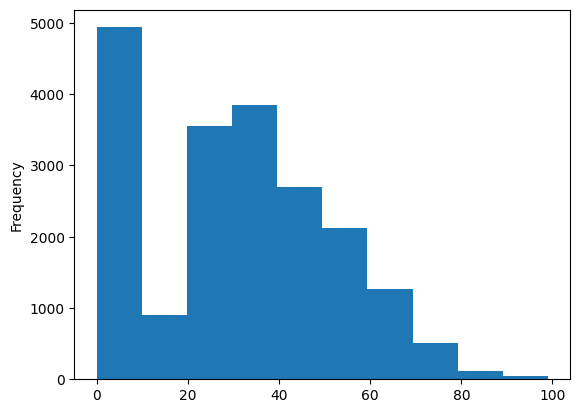

In [54]:
df['Victim_Age'].plot.hist()

In [55]:
df.describe()

,Latitude,Longitude,reporting_delay_day_count,Victim_Age,Premise_Code,Area_ID,Part 1-2,max_activity
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000
mean,33.940704,-117.893072,22.120000,30.13540,297.176950,10.834250,1.418150,14.633300
std,2.126810,7.377726,116.418619,21.86308,212.007298,6.033166,0.493267,11.527028
min,0.000000,-118.663400,0.000000,0.00000,101.000000,1.000000,1.000000,0.000000
25%,34.009200,-118.429700,0.000000,12.00000,101.000000,6.000000,1.000000,4.000000
50%,34.058700,-118.323000,0.000000,31.00000,203.000000,11.000000,1.000000,14.000000
75%,34.165025,-118.274400,2.000000,46.00000,501.000000,16.000000,2.000000,19.000000
max,34.328100,0.000000,1437.000000,99.00000,969.000000,21.000000,2.000000,49.000000


In [56]:
df.loc[df['Victim_Age']==0,'Victim_Age']=df['Victim_Age'].mean()

<Axes: ylabel='Frequency'>

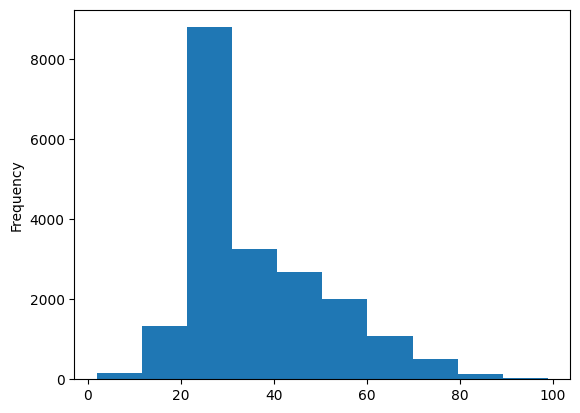

In [57]:
df['Victim_Age'].plot.hist()

In [58]:
df['Part 1-2'].value_counts()

Part 1-2
1.0    11637
2.0     8363
Name: count, dtype: int64

In [59]:
df.loc[:,'Part 1-2']=df['Part 1-2'].apply(lambda x: int(x))

In [60]:
df

,Latitude,Longitude,reporting_delay_day_count,day_category,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Weapon_Description,Area_ID,Modus_Operandi,Part 1-2,Status,Crime_Category,max_activity
0,34.1522,-118.3910,3,Evening,75.0000,M,W,101.0,UNKNOWN WEAPON/OTHER WEAPON,15.0,0385,1.0,IC,Property Crimes,4
1,34.0028,-118.2391,0,Daytime,41.0000,M,H,216.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",13.0,0906 0344 0446 0371 1822 0416 0417 0352,1.0,IC,Property Crimes,39
2,34.0111,-118.2653,0,Morning,67.0000,M,B,501.0,UNKNOWN FIREARM,13.0,1202 0329,2.0,IC,Property Crimes,9
3,34.2953,-118.4590,2,Evening,61.0000,M,H,101.0,VERBAL THREAT,19.0,1300 0329,1.0,IC,Property Crimes,9
4,33.9787,-118.2918,0,Morning,30.1354,X,X,401.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",12.0,0400 0344 0945 0416 1822 0417,1.0,IC,Property Crimes,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,34.0334,-118.3523,0,Morning,51.0000,M,H,501.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",3.0,2004 0913 0416 0446,2.0,IC,Violent Crimes,19
19996,34.2212,-118.5011,0,Night,30.1354,M,W,301.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",10.0,1420 1414 0209 0344 1822,1.0,IC,Property Crimes,24
19997,34.0571,-118.3815,0,Daytime,42.0000,M,H,102.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",8.0,1420 0344 1822,1.0,IC,Property Crimes,14
19998,33.7451,-118.2835,0,Morning,76.0000,F,H,501.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",5.0,2038 1202 0553 1242 0602 0913,2.0,IC,Crimes against Public Order,29


In [61]:
df.loc[:,'Victim_Age']=df['Victim_Age'].apply(lambda x: int(x))

In [62]:
df.isnull().sum()

Latitude                     0
Longitude                    0
reporting_delay_day_count    0
day_category                 0
Victim_Age                   0
Victim_Sex                   0
Victim_Descent               0
Premise_Code                 0
Weapon_Description           0
Area_ID                      0
Modus_Operandi               0
Part 1-2                     0
Status                       0
Crime_Category               0
max_activity                 0
dtype: int64

In [63]:
df

,Latitude,Longitude,reporting_delay_day_count,day_category,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Weapon_Description,Area_ID,Modus_Operandi,Part 1-2,Status,Crime_Category,max_activity
0,34.1522,-118.3910,3,Evening,75.0,M,W,101.0,UNKNOWN WEAPON/OTHER WEAPON,15.0,0385,1.0,IC,Property Crimes,4
1,34.0028,-118.2391,0,Daytime,41.0,M,H,216.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",13.0,0906 0344 0446 0371 1822 0416 0417 0352,1.0,IC,Property Crimes,39
2,34.0111,-118.2653,0,Morning,67.0,M,B,501.0,UNKNOWN FIREARM,13.0,1202 0329,2.0,IC,Property Crimes,9
3,34.2953,-118.4590,2,Evening,61.0,M,H,101.0,VERBAL THREAT,19.0,1300 0329,1.0,IC,Property Crimes,9
4,33.9787,-118.2918,0,Morning,30.0,X,X,401.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",12.0,0400 0344 0945 0416 1822 0417,1.0,IC,Property Crimes,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,34.0334,-118.3523,0,Morning,51.0,M,H,501.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",3.0,2004 0913 0416 0446,2.0,IC,Violent Crimes,19
19996,34.2212,-118.5011,0,Night,30.0,M,W,301.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",10.0,1420 1414 0209 0344 1822,1.0,IC,Property Crimes,24
19997,34.0571,-118.3815,0,Daytime,42.0,M,H,102.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",8.0,1420 0344 1822,1.0,IC,Property Crimes,14
19998,33.7451,-118.2835,0,Morning,76.0,F,H,501.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",5.0,2038 1202 0553 1242 0602 0913,2.0,IC,Crimes against Public Order,29


In [64]:
df['Area_ID'].value_counts()

Area_ID
12.0    1345
14.0    1157
1.0     1156
3.0     1130
18.0    1067
15.0    1065
6.0     1014
13.0     999
20.0     960
7.0      943
2.0      931
8.0      910
9.0      902
5.0      872
19.0     870
11.0     839
21.0     792
10.0     790
17.0     769
4.0      755
16.0     734
Name: count, dtype: int64

In [65]:
df.drop('max_activity',axis=1,inplace=True)

/tmp/ipykernel_18/876014097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('max_activity',axis=1,inplace=True)


In [66]:

df.loc[df['Weapon_Description'] == 'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)', 'Weapon_Description'] = 'Physical Force'


In [67]:
df['Weapon_Description'].value_counts()

Weapon_Description
Physical Force                                   10817
UNKNOWN WEAPON/OTHER WEAPON                       2201
VERBAL THREAT                                     1464
HAND GUN                                          1083
KNIFE WITH BLADE 6INCHES OR LESS                   432
SEMI-AUTOMATIC PISTOL                              401
UNKNOWN FIREARM                                    394
OTHER KNIFE                                        349
MACE/PEPPER SPRAY                                  234
VEHICLE                                            221
ROCK/THROWN OBJECT                                 171
KITCHEN KNIFE                                      153
BOTTLE                                             141
PIPE/METAL PIPE                                    140
STICK                                              138
CLUB/BAT                                           135
AIR PISTOL/REVOLVER/RIFLE/BB GUN                   110
KNIFE WITH BLADE OVER 6 INCHES IN LENGTH      

In [68]:

def gun(s):
    t=s.replace('/',' ')
    listt=t.split(' ' or '/')
    gun_keywords=['gun','pistol','revolver','rifle','shotgun']
    
    sharp_heavy_object=['blade','stone','knife','metal','screwdriver','cleaver', 'glass','machete' ,'iron' , 'cutting','axe' ,'instrument','hammer','weapon','object','bottle','weapons','brass','scissors']
    
    other_weapon = ['bomb','threat', 'demand', 'poison', 'ice', 'scalding', 'board','block' ,'brick', 'stick', 'bat', 'spray']
    
    physical_presence=['physical','presence']
    
    fire=['firearm' , 'fire' ]

    for i in listt:
        if i.lower() in gun_keywords:
            return 'Gun'
        elif i.lower() in sharp_heavy_object:
            return 'sharp_heavy_object'
        
        elif i.lower() in fire:
            return 'fire'
        elif i.lower() in other_weapon:
            return 'other_weapon'
        elif i.lower() in physical_presence:
            return 'Physical Force'
        
    return s
    



df.loc[:,'Weapon_Description']=df['Weapon_Description'].apply(gun)

In [69]:
df['Weapon_Description'].value_counts()

Weapon_Description
Physical Force        10869
sharp_heavy_object     4450
other_weapon           2101
Gun                    1848
fire                    511
VEHICLE                 221
Name: count, dtype: int64

In [70]:
len(df['Premise_Code'].value_counts())

217

In [71]:
len(df['Area_ID'].value_counts())

21

In [72]:
numeric_columns=[['Latitude','Longitude','reporting_delay_day_count','Victim_Age']]
categorical_columns=[['day_category','Victim_Sex','Victim_Descent','Premise_Code','Area_ID','Part 1-2','Status']] #ohe
multilabel_binarizer=[['Modus_Operandi']] 


In [73]:
df

,Latitude,Longitude,reporting_delay_day_count,day_category,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Weapon_Description,Area_ID,Modus_Operandi,Part 1-2,Status,Crime_Category
0,34.1522,-118.3910,3,Evening,75.0,M,W,101.0,sharp_heavy_object,15.0,0385,1.0,IC,Property Crimes
1,34.0028,-118.2391,0,Daytime,41.0,M,H,216.0,Physical Force,13.0,0906 0344 0446 0371 1822 0416 0417 0352,1.0,IC,Property Crimes
2,34.0111,-118.2653,0,Morning,67.0,M,B,501.0,fire,13.0,1202 0329,2.0,IC,Property Crimes
3,34.2953,-118.4590,2,Evening,61.0,M,H,101.0,other_weapon,19.0,1300 0329,1.0,IC,Property Crimes
4,33.9787,-118.2918,0,Morning,30.0,X,X,401.0,Physical Force,12.0,0400 0344 0945 0416 1822 0417,1.0,IC,Property Crimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,34.0334,-118.3523,0,Morning,51.0,M,H,501.0,Physical Force,3.0,2004 0913 0416 0446,2.0,IC,Violent Crimes
19996,34.2212,-118.5011,0,Night,30.0,M,W,301.0,Physical Force,10.0,1420 1414 0209 0344 1822,1.0,IC,Property Crimes
19997,34.0571,-118.3815,0,Daytime,42.0,M,H,102.0,Physical Force,8.0,1420 0344 1822,1.0,IC,Property Crimes
19998,33.7451,-118.2835,0,Morning,76.0,F,H,501.0,Physical Force,5.0,2038 1202 0553 1242 0602 0913,2.0,IC,Crimes against Public Order


In [74]:
y=df['Crime_Category']

df.drop('Crime_Category',axis=1,inplace=True)

/tmp/ipykernel_18/448365884.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Crime_Category',axis=1,inplace=True)


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Latitude                   20000 non-null  float64
 1   Longitude                  20000 non-null  float64
 2   reporting_delay_day_count  20000 non-null  int64  
 3   day_category               20000 non-null  object 
 4   Victim_Age                 20000 non-null  float64
 5   Victim_Sex                 20000 non-null  object 
 6   Victim_Descent             20000 non-null  object 
 7   Premise_Code               20000 non-null  float64
 8   Weapon_Description         20000 non-null  object 
 9   Area_ID                    20000 non-null  float64
 10  Modus_Operandi             20000 non-null  object 
 11  Part 1-2                   20000 non-null  float64
 12  Status                     20000 non-null  object 
dtypes: float64(6), int64(1), object(6)
memory usag

In [76]:
df.drop('Premise_Code',axis=1,inplace=True)

/tmp/ipykernel_18/1308723833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Premise_Code',axis=1,inplace=True)


In [77]:
y.shape

(20000,)

In [78]:
from sklearn.model_selection import train_test_split

xtrain, xtest ,ytrain , ytest= train_test_split(df , y , test_size=0.2 , random_state=42 , shuffle=True ,stratify = y  )

In [79]:
print(xtrain.shape) 
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(16000, 12)
(16000,)
(4000, 12)
(4000,)


In [80]:
from sklearn.dummy import DummyClassifier

dummy_clf=DummyClassifier(random_state=42 , strategy="most_frequent")
dummy_clf.fit(xtrain, ytrain)
print('Dummy train score', dummy_clf.score(ytrain,ytrain))
print('Dummy predicted train score', dummy_clf.score(xtrain,dummy_clf.predict(xtrain)))

print('Dummy test score', dummy_clf.score(xtest, ytest))

print('Dummy predicted test score', dummy_clf.score(xtest, dummy_clf.predict(xtest)))

Dummy train score 0.5833125
Dummy predicted train score 1.0
Dummy test score 0.58325
Dummy predicted test score 1.0


Logistic 

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Latitude                   20000 non-null  float64
 1   Longitude                  20000 non-null  float64
 2   reporting_delay_day_count  20000 non-null  int64  
 3   day_category               20000 non-null  object 
 4   Victim_Age                 20000 non-null  float64
 5   Victim_Sex                 20000 non-null  object 
 6   Victim_Descent             20000 non-null  object 
 7   Weapon_Description         20000 non-null  object 
 8   Area_ID                    20000 non-null  float64
 9   Modus_Operandi             20000 non-null  object 
 10  Part 1-2                   20000 non-null  float64
 11  Status                     20000 non-null  object 
dtypes: float64(5), int64(1), object(6)
memory usage: 1.8+ MB


In [83]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16000 entries, 6735 to 554
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Latitude                   16000 non-null  float64
 1   Longitude                  16000 non-null  float64
 2   reporting_delay_day_count  16000 non-null  int64  
 3   day_category               16000 non-null  object 
 4   Victim_Age                 16000 non-null  float64
 5   Victim_Sex                 16000 non-null  object 
 6   Victim_Descent             16000 non-null  object 
 7   Weapon_Description         16000 non-null  object 
 8   Area_ID                    16000 non-null  float64
 9   Modus_Operandi             16000 non-null  object 
 10  Part 1-2                   16000 non-null  float64
 11  Status                     16000 non-null  object 
dtypes: float64(5), int64(1), object(6)
memory usage: 1.6+ MB


In [84]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MultiLabelBinarizer

class MultiLabelBinarizerWrapper(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.mlb = MultiLabelBinarizer()

    def fit(self, X, y=None):
        self.mlb.fit(X)
        return self

    def transform(self, X):
        return self.mlb.transform(X)

In [85]:

from sklearn.preprocessing import StandardScaler , OneHotEncoder  , MultiLabelBinarizer
from sklearn.feature_extraction.text import CountVectorizer
ct=ColumnTransformer(transformers=[
    
    ('numerical_cols' , StandardScaler(),['Latitude','Longitude','reporting_delay_day_count','Victim_Age']),
    ('categorical_cols' , OneHotEncoder(handle_unknown='ignore'),['day_category','Victim_Sex','Victim_Descent','Part 1-2','Area_ID','Status','Weapon_Description']),
    ('multi_label_binarizer', MultiLabelBinarizerWrapper(), 'Modus_Operandi')
])
    

In [86]:
len(df['Area_ID'].value_counts())

21

In [87]:
# pipe_logistic = Pipeline(steps=[('ct',ct),('logistic_reg',LogisticRegression(solver='saga',C=0.1,warm_start=True, max_iter=1500 ,random_state=42))])

In [88]:
# pipe_logistic.fit(xtrain,ytrain)

In [89]:
# pipe_logistic.score(xtest,ytest)

In [90]:
from sklearn.svm import SVC
pipe_svc=Pipeline(steps=[('ct',ct),('svc',SVC(decision_function_shape='ovo'))])

In [91]:
pipe_svc.fit(xtest,ytest)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('numerical_cols',
                                                  StandardScaler(),
                                                  ['Latitude', 'Longitude',
                                                   'reporting_delay_day_count',
                                                   'Victim_Age']),
                                                 ('categorical_cols',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['day_category', 'Victim_Sex',
                                                   'Victim_Descent', 'Part 1-2',
                                                   'Area_ID', 'Status',
                                                   'Weapon_Description']),
                                                 ('multi_label_binarizer',
                                                  MultiLabelBinarizerWrapper(),
                                                  'Modus_Operandi')])),
                ('svc', SVC(decision_function_shape='ovo'))])

In [92]:
pipe_svc.score(xtest,ytest)

0.865

Test 


In [93]:
test=pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/test.csv')
test['day_category']=test['Time_Occurred'].apply(day_category )


test['Date_Reported']=test['Date_Reported'].apply(extract_date)
test['Date_Occurred']=test['Date_Occurred'].apply(extract_date)






test['Date_Reported']=pd.to_datetime(test['Date_Reported']).dt.date
test['Date_Occurred']=pd.to_datetime(test['Date_Occurred']).dt.date

test['reporting_delay_day_count']=(test['Date_Reported']-test['Date_Occurred'])






def day_count(d):
    return d.days
test['reporting_delay_day_count']=test['reporting_delay_day_count'].apply(day_count)






def victim_gender(val):
    if val=='H' or pd.isna(val):
        val='X'
    return val


test.loc[:,'Victim_Sex'] = test['Victim_Sex'].apply(victim_gender)





unique_values_weapon_test=pd.DataFrame(test['Weapon_Description'])
unique_values_weapon_test.value_counts(normalize=True)







distribution_test = test['Weapon_Description'].dropna().value_counts(normalize=True)

missing_test = test['Weapon_Description'].isnull().sum()

imputed_values_test = np.random.choice(distribution_test.index, size=missing_test, p=distribution_test.values)

# Impute the missing values
test.loc[test['Weapon_Description'].isnull(), 'Weapon_Description'] = imputed_values_test



In [94]:
test.isnull().sum()

Location                        0
Cross_Street                 4190
Latitude                        0
Longitude                       0
Date_Reported                   0
Date_Occurred                   0
Time_Occurred                   0
Area_ID                         0
Area_Name                       0
Reporting_District_no           0
Part 1-2                        0
Modus_Operandi                684
Victim_Age                      0
Victim_Sex                      0
Victim_Descent                643
Premise_Code                    0
Premise_Description             1
Weapon_Used_Code             3153
Weapon_Description              0
Status                          0
Status_Description              0
day_category                    0
reporting_delay_day_count       0
dtype: int64

In [95]:
distribution_test = test['Victim_Descent'].dropna().value_counts(normalize=True)

missing_test = test['Victim_Descent'].isnull().sum()

imputed_values_test = np.random.choice(distribution_test.index, size=missing_test, p=distribution_test.values)

# Impute the missing values
test.loc[test['Victim_Descent'].isnull(), 'Victim_Descent'] = imputed_values_test

In [96]:
test['Modus_Operandi']=test['Modus_Operandi'].apply(number_of_activities)
test['Part 1-2']=test['Part 1-2'].apply(lambda x : int(x))
test['Victim_Age']=test['Victim_Age'].apply(lambda x: int(x))

In [97]:
test.loc[test['Weapon_Description'] == 'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)', 'Weapon_Description'] = 'Physical Force'



test.loc[:,'Weapon_Description']=test['Weapon_Description'].apply(gun)

In [98]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16000 entries, 6735 to 554
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Latitude                   16000 non-null  float64
 1   Longitude                  16000 non-null  float64
 2   reporting_delay_day_count  16000 non-null  int64  
 3   day_category               16000 non-null  object 
 4   Victim_Age                 16000 non-null  float64
 5   Victim_Sex                 16000 non-null  object 
 6   Victim_Descent             16000 non-null  object 
 7   Weapon_Description         16000 non-null  object 
 8   Area_ID                    16000 non-null  float64
 9   Modus_Operandi             16000 non-null  object 
 10  Part 1-2                   16000 non-null  float64
 11  Status                     16000 non-null  object 
dtypes: float64(5), int64(1), object(6)
memory usage: 1.6+ MB


In [99]:
test=test[['Latitude','Longitude','reporting_delay_day_count','day_category','Area_ID','Victim_Age','Victim_Sex','Modus_Operandi','Victim_Descent','Part 1-2','Weapon_Description','Status']]

In [100]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Latitude                   5000 non-null   float64
 1   Longitude                  5000 non-null   float64
 2   reporting_delay_day_count  5000 non-null   int64  
 3   day_category               5000 non-null   object 
 4   Area_ID                    5000 non-null   float64
 5   Victim_Age                 5000 non-null   int64  
 6   Victim_Sex                 5000 non-null   object 
 7   Modus_Operandi             5000 non-null   object 
 8   Victim_Descent             5000 non-null   object 
 9   Part 1-2                   5000 non-null   int64  
 10  Weapon_Description         5000 non-null   object 
 11  Status                     5000 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 468.9+ KB


In [101]:
test

,Latitude,Longitude,reporting_delay_day_count,day_category,Area_ID,Victim_Age,Victim_Sex,Modus_Operandi,Victim_Descent,Part 1-2,Weapon_Description,Status
0,34.0128,-118.3045,0,Evening,3.0,28,F,1813 2000 1241 0416 1821 1243,H,2,Physical Force,IC
1,34.0726,-118.3029,37,Night,20.0,26,M,0394 0344,B,1,sharp_heavy_object,IC
2,33.9348,-118.2695,1,Morning,18.0,62,F,0701 1202 0355 0100 1914 1822,B,2,other_weapon,IC
3,34.0497,-118.3442,20,Night,7.0,0,X,,H,1,Gun,IC
4,34.1611,-118.3704,1,Night,15.0,37,F,1501,W,2,Physical Force,AO
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,34.0409,-118.3408,1,Night,7.0,0,X,,H,1,Gun,IC
4996,34.0347,-118.2253,7,Daytime,4.0,0,X,1300 0325,X,1,Physical Force,IC
4997,34.2392,-118.4698,0,Night,19.0,38,M,0913 1817 0416,H,2,Physical Force,AA
4998,34.0453,-118.2443,1,Night,1.0,41,M,0416,B,2,sharp_heavy_object,AO


In [102]:
test.shape

(5000, 12)

In [103]:
sample=pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv')
sample

,ID,Crime_Category,Unnamed: 2
0,1,Crimes against Persons,NaN
1,2,Crimes against Public Order,NaN
2,3,Other Crimes,NaN
3,4,Crimes against Public Order,NaN
4,5,Other Crimes,NaN
...,...,...,...
995,996,Fraud and White-Collar Crimes,NaN
996,997,Property Crimes,NaN
997,998,Violent Crimes,NaN
998,999,Property Crimes,NaN


In [104]:
test.isnull().sum()

Latitude                     0
Longitude                    0
reporting_delay_day_count    0
day_category                 0
Area_ID                      0
Victim_Age                   0
Victim_Sex                   0
Modus_Operandi               0
Victim_Descent               0
Part 1-2                     0
Weapon_Description           0
Status                       0
dtype: int64

In [105]:
y_pred=pipe_svc.predict(test)
submission=pd.DataFrame({'ID': np.arange(1,5000+1), 'Crime_Category': y_pred})

submission.to_csv('submission.csv',index=False)